In [3]:
import gpxpy
import matplotlib.pyplot as plt
import datetime
from geopy import distance
from math import sqrt, floor
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import haversine

In [6]:
gpx_file = open('gps_dataset.gpx', 'r')
gpx = gpxpy.parse(gpx_file)
print(gpx)

GPX(tracks=[GPXTrack(name='Monomo', segments=[GPXTrackSegment(points=[...])])])


In [8]:
print(len(gpx.tracks))
print(len(gpx.tracks[0].segments))
print(len(gpx.tracks[0].segments[0].points))

1
1
2426


In [9]:
data = gpx.tracks[0].segments[0].points
print(data)

[GPXTrackPoint(13.725929, 100.491491, elevation=9.8, time=datetime.datetime(2018, 7, 24, 7, 32, 31, tzinfo=SimpleTZ("Z"))), GPXTrackPoint(13.725939, 100.491541, elevation=10.5, time=datetime.datetime(2018, 7, 24, 7, 32, 33, tzinfo=SimpleTZ("Z"))), GPXTrackPoint(13.725943, 100.491575, elevation=10.7, time=datetime.datetime(2018, 7, 24, 7, 32, 35, tzinfo=SimpleTZ("Z"))), GPXTrackPoint(13.72597, 100.491629, elevation=10.8, time=datetime.datetime(2018, 7, 24, 7, 32, 37, tzinfo=SimpleTZ("Z"))), GPXTrackPoint(13.725987, 100.491667, elevation=11.1, time=datetime.datetime(2018, 7, 24, 7, 32, 38, tzinfo=SimpleTZ("Z"))), GPXTrackPoint(13.72601, 100.491693, elevation=11.0, time=datetime.datetime(2018, 7, 24, 7, 32, 39, tzinfo=SimpleTZ("Z"))), GPXTrackPoint(13.726035, 100.491723, elevation=10.9, time=datetime.datetime(2018, 7, 24, 7, 32, 40, tzinfo=SimpleTZ("Z"))), GPXTrackPoint(13.726069, 100.491756, elevation=10.8, time=datetime.datetime(2018, 7, 24, 7, 32, 41, tzinfo=SimpleTZ("Z"))), GPXTrackPo

In [10]:
## Start Position
start = data[0]
## End Position
finish = data[-1]

In [12]:
df = pd.DataFrame(columns=['lon', 'lat', 'alt', 'time'])
for point in data:
    df = df.append({'lon': point.longitude, 'lat' : point.latitude, 'alt' : point.elevation, 'time' : point.time}, ignore_index=True)
    
df.head()

,lon,lat,alt,time
0,100.491491,13.725929,9.8,2018-07-24 07:32:31+00:00
1,100.491541,13.725939,10.5,2018-07-24 07:32:33+00:00
2,100.491575,13.725943,10.7,2018-07-24 07:32:35+00:00
3,100.491629,13.725970,10.8,2018-07-24 07:32:37+00:00
4,100.491667,13.725987,11.1,2018-07-24 07:32:38+00:00


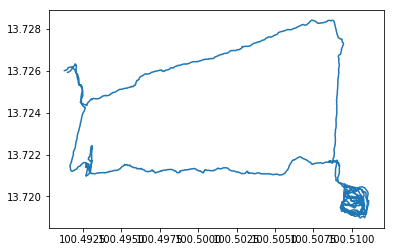

In [13]:
plt.plot(df['lon'], df['lat'])

In [19]:
_data = [go.Scatter3d(x=df['lon'], 
         y=df['lat'], z=df['alt'], mode='lines')]
py.iplot(_data)

AttributeError: module 'plotly.validators.scatter3d' has no attribute 'TexttemplateValidator'

In [21]:
alt_dif = [0]
time_dif = [0]
dist_vin = [0]
dist_hav = [0]
dist_vin_no_alt = [0]
dist_hav_no_alt = [0]
dist_dif_hav_2d = [0]
dist_dif_vin_2d = [0]
for index in range(len(data)):
    if index == 0:
        pass
    else:
        start = data[index-1]
        
        stop = data[index]
        
        distance_vin_2d = distance.vincenty((start.latitude, start.longitude), (stop.latitude, stop.longitude)).m
        dist_dif_vin_2d.append(distance_vin_2d)
        
        distance_hav_2d = haversine.haversine((start.latitude, start.longitude), (stop.latitude, stop.longitude))*1000
        dist_dif_hav_2d.append(distance_hav_2d)
        
        dist_vin_no_alt.append(dist_vin_no_alt[-1] + distance_vin_2d)
        
        dist_hav_no_alt.append(dist_hav_no_alt[-1] + distance_hav_2d)
        
        alt_d = start.elevation - stop.elevation
        
        alt_dif.append(alt_d)
        
        distance_vin_3d = sqrt(distance_vin_2d**2 + (alt_d)**2)
        
        distance_hav_3d = sqrt(distance_hav_2d**2 + (alt_d)**2)
                
        time_delta = (stop.time - start.time).total_seconds()
        
        time_dif.append(time_delta)
                
        dist_vin.append(dist_vin[-1] + distance_vin_3d)
        
        dist_hav.append(dist_hav[-1] + distance_hav_3d)

/Users/jonghyunlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning:

Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.



In [22]:
df['dis_vin_2d'] = dist_vin_no_alt 
df['dist_hav_2d'] = dist_hav_no_alt
df['dis_vin_3d'] = dist_vin
df['dis_hav_3d'] = dist_hav
df['alt_dif'] = alt_dif
df['time_dif'] = time_dif
df['dis_dif_hav_2d'] = dist_dif_hav_2d
df['dis_dif_vin_2d'] = dist_dif_vin_2d

In [23]:
print('Vincenty 2D : ', dist_vin_no_alt[-1])
print('Haversine 2D : ', dist_hav_no_alt[-1])
print('Vincenty 3D : ', dist_vin[-1])
print('Haversine 3D : ', dist_hav[-1])
print('Total Time : ', floor(sum(time_dif)/60),' min ', int(sum(time_dif)%60),' sec ')

Vincenty 2D :  11078.328197009236
Haversine 2D :  11091.384447379329
Vincenty 3D :  11148.126426420153
Haversine 3D :  11161.152600185571
Total Time :  56  min  51  sec 


In [24]:
df['dist_dif_per_sec'] = df['dis_dif_hav_2d'] / df['time_dif']

In [25]:
for treshold in [0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    print(treshold, 'm', ' : Time:', 
          sum(df[df['dist_dif_per_sec'] < treshold]['time_dif']),
         ' seconds')

0.5 m  : Time: 8.0  seconds
0.6 m  : Time: 23.0  seconds
0.7 m  : Time: 39.0  seconds
0.8 m  : Time: 49.0  seconds
0.9 m  : Time: 57.0  seconds
1 m  : Time: 72.0  seconds


In [27]:
df.head()

,lon,lat,alt,time,dis_vin_2d,dist_hav_2d,dis_vin_3d,dis_hav_3d,alt_dif,time_dif,dis_dif_hav_2d,dis_dif_vin_2d,dist_dif_per_sec
0,100.491491,13.725929,9.8,2018-07-24 07:32:31+00:00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN
1,100.491541,13.725939,10.5,2018-07-24 07:32:33+00:00,5.519996,5.514254,5.564203,5.558506,-0.7,2.0,5.514254,5.519996,2.757127
2,100.491575,13.725943,10.7,2018-07-24 07:32:35+00:00,9.223959,9.213753,9.273562,9.263408,-0.2,2.0,3.699499,3.703963,1.849750
3,100.491629,13.725970,10.8,2018-07-24 07:32:37+00:00,15.784158,15.774099,15.834523,15.824516,-0.1,2.0,6.560346,6.560199,3.280173
4,100.491667,13.725987,11.1,2018-07-24 07:32:38+00:00,20.304132,20.293192,20.364442,20.353556,-0.3,1.0,4.519093,4.519974,4.519093


In [28]:
df['spd'] = (df['dis_dif_hav_2d'] / df['time_dif']) * 3.6

In [30]:
df_with_timeout = df[df['dist_dif_per_sec'] > 0.9]

In [31]:
avg_km_h = (sum((df_with_timeout['spd'] * 
                 df_with_timeout['time_dif'])) / 
            sum(df_with_timeout['time_dif']))
print(floor(60 / avg_km_h), 'minutes',
      round(((60 / avg_km_h - floor(60 / avg_km_h))*60), 0),
     ' seconds')

5 minutes 3.0  seconds


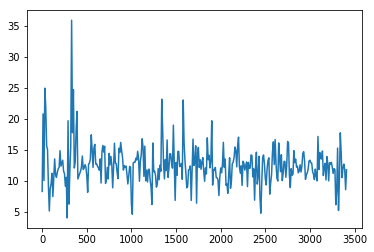

In [32]:
df['time10s'] = list(map(lambda x: round(x, -1)
                         , np.cumsum(df['time_dif'])))
plt.plot(df.groupby(['time10s']).mean()['spd'])

In [34]:
df.head(30)

,lon,lat,alt,time,dis_vin_2d,dist_hav_2d,dis_vin_3d,dis_hav_3d,alt_dif,time_dif,dis_dif_hav_2d,dis_dif_vin_2d,dist_dif_per_sec,spd,time10s
0,100.491491,13.725929,9.8,2018-07-24 07:32:31+00:00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN,NaN,0.0
1,100.491541,13.725939,10.5,2018-07-24 07:32:33+00:00,5.519996,5.514254,5.564203,5.558506,-0.7,2.0,5.514254,5.519996,2.757127,9.925657,0.0
2,100.491575,13.725943,10.7,2018-07-24 07:32:35+00:00,9.223959,9.213753,9.273562,9.263408,-0.2,2.0,3.699499,3.703963,1.849750,6.659099,0.0
3,100.491629,13.725970,10.8,2018-07-24 07:32:37+00:00,15.784158,15.774099,15.834523,15.824516,-0.1,2.0,6.560346,6.560199,3.280173,11.808623,10.0
4,100.491667,13.725987,11.1,2018-07-24 07:32:38+00:00,20.304132,20.293192,20.364442,20.353556,-0.3,1.0,4.519093,4.519974,4.519093,16.268736,10.0
5,100.491693,13.726010,11.0,2018-07-24 07:32:39+00:00,24.096681,24.091673,24.158309,24.153353,0.1,1.0,3.798480,3.792549,3.798480,13.674530,10.0
6,100.491723,13.726035,10.9,2018-07-24 07:32:40+00:00,28.360362,28.361229,28.423163,28.424080,0.1,1.0,4.269556,4.263681,4.269556,15.370402,10.0
7,100.491756,13.726069,10.8,2018-07-24 07:32:41+00:00,33.545891,33.557368,33.609655,33.621181,0.1,1.0,5.196140,5.185528,5.196140,18.706102,10.0
8,100.491801,13.726124,10.6,2018-07-24 07:32:42+00:00,41.338002,41.369555,41.404333,41.435928,0.2,1.0,7.812187,7.792112,7.812187,28.123873,10.0
9,100.491866,13.726193,10.6,2018-07-24 07:32:43+00:00,51.716066,51.769786,51.782397,51.836159,0.0,1.0,10.400231,10.378063,10.400231,37.440831,10.0


In [35]:
def positive_only(x):
    if x > 0:
        return x
    else:
        return 0
pos_only = list(map(positive_only, df['alt_dif']))
sum(pos_only)

237.19999999999897

In [36]:
sum(list(map(lambda x: round(x,0) , pos_only)))

137.0